In [62]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    e_x = np.exp(x - x.max(axis=1, keepdims=True))  # Tránh tràn số
    return e_x / e_x.sum(axis=1, keepdims=True)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.05):
    return np.where(x > 0, 1, alpha)

def softmax_derivative(x):
    return

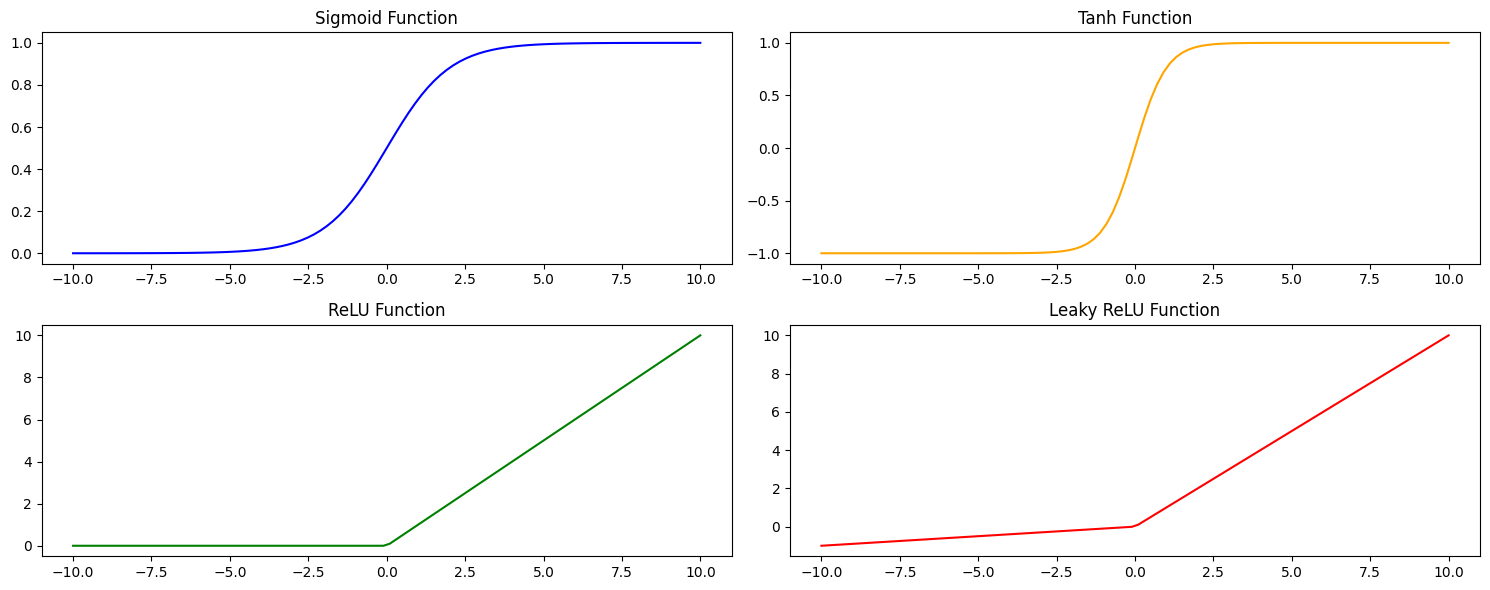

In [63]:
# Plot sigmoid function, tanh function, relu function, and leaky relu function
import matplotlib.pyplot as plt
x_values = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(x_values, sigmoid(x_values), color='blue')
plt.title('Sigmoid Function')
plt.subplot(2, 2, 2)
plt.plot(x_values, tanh(x_values), color='orange')
plt.title('Tanh Function')
plt.subplot(2, 2, 3)
plt.plot(x_values, relu(x_values), color='green')
plt.title('ReLU Function')
plt.subplot(2, 2, 4)
plt.plot(x_values, leaky_relu(x_values), color='red')
plt.title('Leaky ReLU Function')
plt.tight_layout()
plt.show()

Epoch 0, Loss: 0.9487
Epoch 1000, Loss: 0.6931
Epoch 2000, Loss: 0.6931
Epoch 3000, Loss: 0.6931
Epoch 4000, Loss: 0.6930
Epoch 5000, Loss: 0.6930
Epoch 6000, Loss: 0.6928
Epoch 7000, Loss: 0.6923
Epoch 8000, Loss: 0.6906
Epoch 9000, Loss: 0.6724
Epoch 10000, Loss: 0.4506
Epoch 11000, Loss: 0.0949
Epoch 12000, Loss: 0.0565
Epoch 13000, Loss: 0.0429
Epoch 14000, Loss: 0.0356
Epoch 15000, Loss: 0.0309
Epoch 16000, Loss: 0.0275
Epoch 17000, Loss: 0.0250
Epoch 18000, Loss: 0.0230
Epoch 19000, Loss: 0.0214
Epoch 20000, Loss: 0.0201
Epoch 21000, Loss: 0.0190
Epoch 22000, Loss: 0.0180
Epoch 23000, Loss: 0.0172
Epoch 24000, Loss: 0.0164
Epoch 25000, Loss: 0.0158
Epoch 26000, Loss: 0.0152
Epoch 27000, Loss: 0.0146
Epoch 28000, Loss: 0.0141
Epoch 29000, Loss: 0.0137
Epoch 30000, Loss: 0.0133
Epoch 31000, Loss: 0.0129
Epoch 32000, Loss: 0.0126
Epoch 33000, Loss: 0.0122
Epoch 34000, Loss: 0.0119
Epoch 35000, Loss: 0.0116
Epoch 36000, Loss: 0.0114
Epoch 37000, Loss: 0.0111
Epoch 38000, Loss: 0.0109

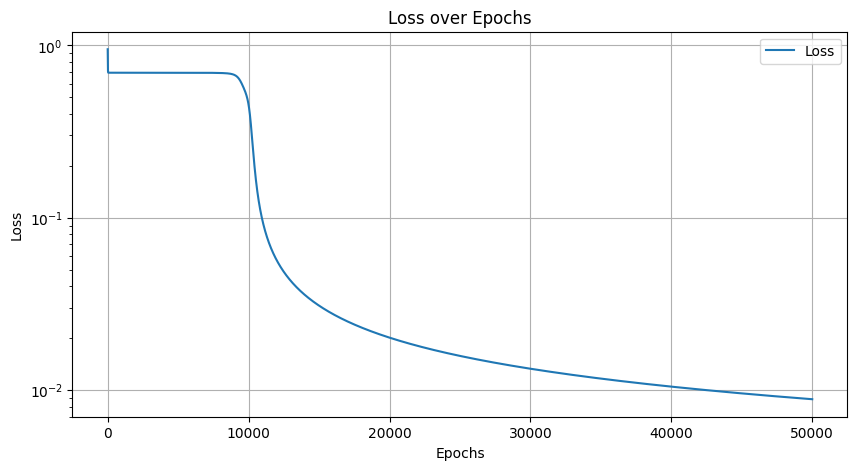

In [ ]:
def generate_weights_biases(num_in_features, num_out_features):
    np.random.seed(0)
    weights = np.random.rand(num_in_features, num_out_features)
    return weights

def XOR_train(x_mau, y_mau, max_iterations, lr):
    N = x_mau.shape[0]  # Number of samples
    
    # Thêm cột bias vào x_mau và chuyển vị
    ones_column = np.ones((N, 1))
    x_in = np.hstack((ones_column, x_mau)).T  # (num_features + 1, N)
    num_in_feature_incl_bias = x_in.shape[0] # Number of input features including bias
    y_target = y_mau.T  # Transpose y_mau to match the shape of output layer
    num_hidden_nodes = 3 # Number of nodes in each hidden layer

    # Initialize weights
    w1 = generate_weights_biases(num_hidden_nodes, num_in_feature_incl_bias)
    w2 = generate_weights_biases(num_hidden_nodes, num_hidden_nodes)
    w3 = generate_weights_biases(1, num_hidden_nodes)

    loss = [] # To store the loss of the last epoch

    for epoch in range(max_iterations):
        # Forward pass
        # Layer 1
        n1 = np.dot(w1, x_in)
        H1 = sigmoid(n1)
        
        # Layer 2
        n2 = np.dot(w2, H1)
        H2 = sigmoid(n2)

        # Layer 3 (output layer)
        n3 = np.dot(w3, H2)
        H3 = sigmoid(n3)

        # Calculate loss (Binary Cross-Entropy)
        J = -(y_target * np.log(H3) + (1 - y_target) * np.log(1 - H3))
        current_loss = np.mean(J)
        loss.append(current_loss)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {current_loss:.4f}")

        # Backpropagation
        # Delta for output layer
        
        delta3 = (H3 - y_target) * sigmoid_derivative(n3)
        dw3 = np.dot(delta3, H2.T) / N

        # Delta for hidden layer 2
        delta2 = np.dot(w3.T, delta3) * sigmoid_derivative(n2)
        dw2 = np.dot(delta2, H1.T) / N

        # Delta for hidden layer 1
        delta1 = np.dot(w2.T, delta2) * sigmoid_derivative(n1)
        dw1 = np.dot(delta1, x_in.T) / N
        
        # Update weights
        w3 -= lr * dw3
        w2 -= lr * dw2
        w1 -= lr * dw1

    # Transpose H3 back to (N, 1) for consistency with y_mau in the output loop
    final_output_probs = H3.T
    final_predictions = np.round(final_output_probs)
    
    return final_output_probs, final_predictions, loss

x_mau = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
y_mau = np.array([[0], [1], [1], [0]])

num_samples = x_mau.shape[0]
num_in_features = x_mau.shape[1]
num_out_features = y_mau.shape[1]

# Huấn luyện
output_probs, predictions, final_loss = XOR_train(x_mau, y_mau, max_iterations=50000, lr=0.7)

# Kết quả
for i in range(x_mau.shape[0]):
    print(f"Input: {x_mau[i]}, Expected: {y_mau[i][0]}, Predicted: {int(predictions[i][0])}, Xác Suất: {output_probs[i][0]:.4f}")

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(final_loss, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()